In [ ]:
# Reference Link - https://pyimagesearch.com/2022/06/20/training-the-yolov5-object-detector-on-a-custom-dataset/
# Verion[1] for Model Training

! git clone https://github.com/ultralytics/yolov5.git #clone repo
! cd yolov5/
! pip install -r yolov5/requirements.txt #install dependencies

### **Create configuration**

In [ ]:
# Create configuration
import yaml
config = {'path': '/kaggle/input/yolo-drone-detection-dataset/drone_dataset',
         'train': '/kaggle/input/yolo-drone-detection-dataset/drone_dataset/train',
         'val': '/kaggle/input/yolo-drone-detection-dataset/drone_dataset/valid',
         'nc': 1,
         'names': ['drone']}
 
with open("data.yaml", "w") as file:
    yaml.dump(config, file, default_flow_style=False)

### **YOLOv5 Models**

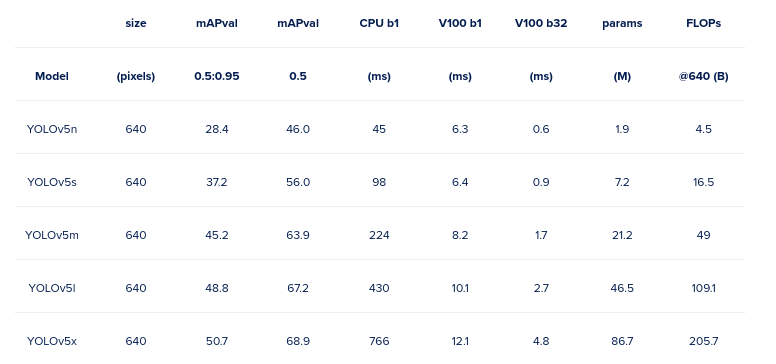

### **Model Parameters**

In [ ]:
SIZE = 640
BATCH_SIZE = 32
EPOCHS = 20
MODEL = "yolov5s"
WORKERS = 1
PROJECT = "drone_detection"
RUN_NAME = f"{MODEL}_size{SIZE}_epochs{EPOCHS}_batch{BATCH_SIZE}_small"

## **Model Training**

In [ ]:
!python yolov5/train.py --img {SIZE} --batch {BATCH_SIZE} --epochs {EPOCHS} --data ./data.yaml --weights {MODEL}.pt --workers {WORKERS} --project {PROJECT} --name {RUN_NAME} --exist-ok

## **Model Fine Tuning**

In [ ]:
!python yolov5/train.py --img {SIZE} --batch {BATCH_SIZE} --epochs {EPOCHS} --data ./data.yaml --weights {MODEL}.pt --workers {WORKERS} --project {PROJECT} --name freeze_layers --exist-ok --freeze 0 1 2 3 4 5 6 7 8 9 10

## **Extracting the Model Weights**

In [ ]:
!zip -r yolo_drone_model.zip "./drone_detection"

In [ ]:
from IPython.display import FileLink
FileLink(r'yolo_drone_model.zip')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# **Inference Model**

In [1]:
import cv2
import torch
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

### **Load Model and Predict**

In [ ]:
model = torch.hub.load("../input/yolov5-drone-detection-keras-tensorflow/yolov5", 'custom', path="/kaggle/input/yolov5-drone-detection-keras-tensorflow/drone_detection/yolov5s_size640_epochs20_batch32_small/weights/best.pt", source='local', force_reload=True)

In [136]:
# Image
img_path = '../input/yolo-drone-detection-dataset/drone_dataset/valid/images/0001.jpg'

img = Image.open(img_path)
img_arr = np.array(img)

# Inference
results = model(img, size=640)

# Results, change the flowing to: results.show()
result_pd = results.pandas().xyxy[0] # or .show(), .save(), .crop(), .pandas(), etc 

for i in range(len(result_pd)):
    shape = [(result_pd['xmin'][i], result_pd['ymin'][i]), (result_pd['xmax'][i], result_pd['ymax'][i])]
    img1 = ImageDraw.Draw(img)
    img1.rectangle(shape, outline ="red")
    
img

In [141]:
# Image
img_path = '../input/yolo-drone-detection-dataset/drone_dataset/valid/images/0015.jpg'

img = Image.open(img_path)
img_arr = np.array(img)

# Inference
results = model(img, size=640)

# Results, change the flowing to: results.show()
result_pd = results.pandas().xyxy[0] # or .show(), .save(), .crop(), .pandas(), etc 

for i in range(len(result_pd)):
    shape = [(result_pd['xmin'][i], result_pd['ymin'][i]), (result_pd['xmax'][i], result_pd['ymax'][i])]
    img1 = ImageDraw.Draw(img)
    img1.rectangle(shape, outline ="red")
    
img

In [145]:
# Image
img_path = '../input/yolo-drone-detection-dataset/drone_dataset/valid/images/0014.jpg'

img = Image.open(img_path)
img_arr = np.array(img)

# Inference
results = model(img, size=640)

# Results, change the flowing to: results.show()
result_pd = results.pandas().xyxy[0] # or .show(), .save(), .crop(), .pandas(), etc 

for i in range(len(result_pd)):
    shape = [(result_pd['xmin'][i], result_pd['ymin'][i]), (result_pd['xmax'][i], result_pd['ymax'][i])]
    img1 = ImageDraw.Draw(img)
    img1.rectangle(shape, outline ="red")
    
img

In [148]:
# Image
img_path = '../input/yolo-drone-detection-dataset/drone_dataset/valid/images/0008.jpg'

img = Image.open(img_path)
img_arr = np.array(img)

# Inference
results = model(img, size=640)

# Results, change the flowing to: results.show()
result_pd = results.pandas().xyxy[0] # or .show(), .save(), .crop(), .pandas(), etc 

for i in range(len(result_pd)):
    shape = [(result_pd['xmin'][i], result_pd['ymin'][i]), (result_pd['xmax'][i], result_pd['ymax'][i])]
    img1 = ImageDraw.Draw(img)
    img1.rectangle(shape, outline ="red")
    
img